In [60]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics,datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

**Generate sample data**

In [61]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

**Normalizing the dataset**

In [62]:
X = StandardScaler().fit_transform(X)

**Training and clustering with DBSCAN**

In [63]:
db = DBSCAN(eps=0.1, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)


core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print (set(labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, -1}


**Finding the number of cluster generated**

In [64]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print (n_clusters_)

57


**Plotting the data and their clusters**

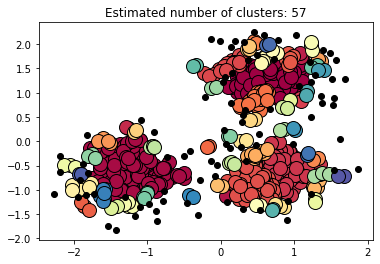

In [65]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**DBSCAN clustering with different parameter value**

In [66]:
db = DBSCAN(eps=0.05, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)


core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print (n_clusters_)

16


**Inappropriate parameter value may lead all the points to noise**

In [67]:
db = DBSCAN(eps=0.005, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)


core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print (n_clusters_)

0


**Plotting the data as noise**

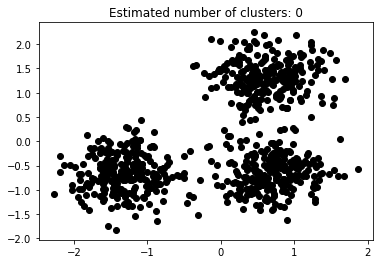

In [68]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [12]:
from google.colab import files
uploaded = files.upload()

Saving iris_org.txt to iris_org.txt
Saving 21D_data.txt to 21D_data.txt
Saving 4D_data.txt to 4D_data.txt
Saving 2D_data.txt to 2D_data.txt


**Clustering with iris data set**

In [69]:
read_file=open("iris_org.txt",'r')
read_content= read_file.read()

all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)-1
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  150
Number the features/samples :-  4


**Number of data points and number of features/samples for each data point**

In [70]:
X=np.zeros((No_data_points,No_of_features))
true_label = []
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        X[counter][i]= values[i]
    true_label.append(int(values[No_of_features]))     #
    counter+=1

#print (true_label)

**Normalizing the dataset**

In [71]:
X = StandardScaler().fit_transform(X)

Training and clustering with DBSCAN

In [72]:
db = DBSCAN(eps=.7, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)


core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print (labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print (n_clusters_)

[ 0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1 -1  0  1  1
  0  1  1  0  1 -1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1
  0  1  1  0  1  2  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1
  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  2
  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1
  0  1  1 -1  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1  0  1  1
  0  1  1  0  1  1]
3


**Plotting the data and their clusters**

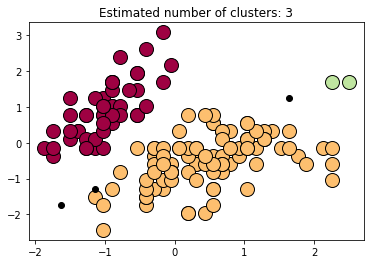

In [73]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Calculate the cluster goodness**

In [74]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
Sil_score=silhouette_score(X,labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.4515664736593728


**Calculate the cluster goodness (Considering true label information)**

In [75]:
ARI=metrics.adjusted_rand_score(true_label, labels)
print (ARI)

0.5497985874344741
